In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
%matplotlib notebook

In [2]:
iris_df = sns.load_dataset('iris')

In [3]:
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_df = pd.get_dummies(data=iris_df)


In [8]:
train, test=train_test_split(iris_df, train_size =.7, random_state=100)


In [9]:
train.shape, test.shape

((105, 7), (45, 7))

In [10]:
x= iris_df[['petal_width', 'sepal_length']]

In [11]:
km = KMeans(n_clusters=3)

In [12]:
km.fit(x)

KMeans(n_clusters=3)

In [13]:
km.predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

In [14]:
x['cluster']=km.predict(x) 

<IPython.core.display.Javascript object>


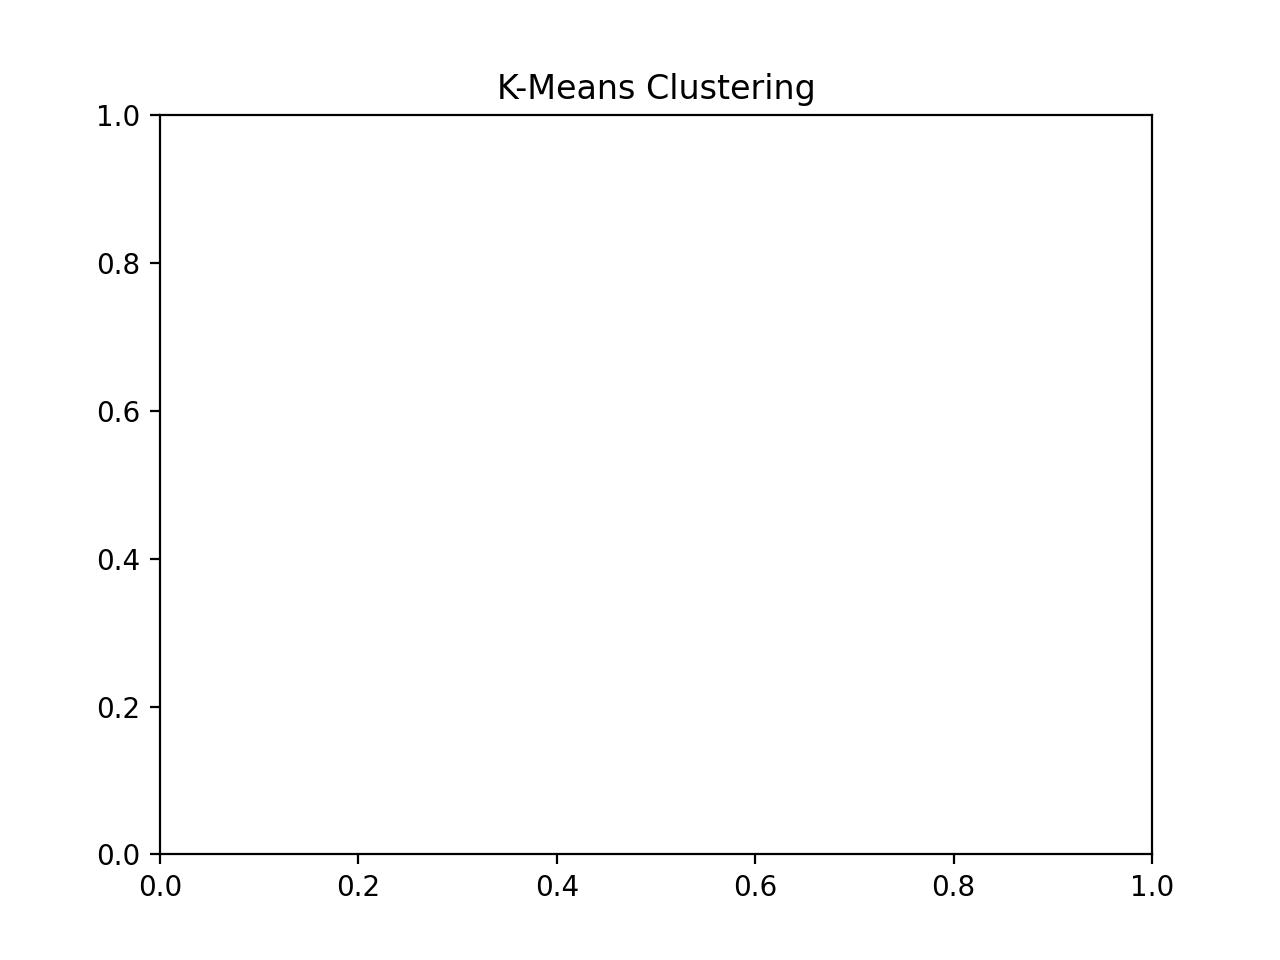

ValueError: Could not interpret value `cluster` for parameter `hue`

In [15]:
plt.title("K-Means Clustering")
sns.relplot(x, x='petal_width', hue='cluster')
plt.show()

# Inertia

<IPython.core.display.Javascript object>


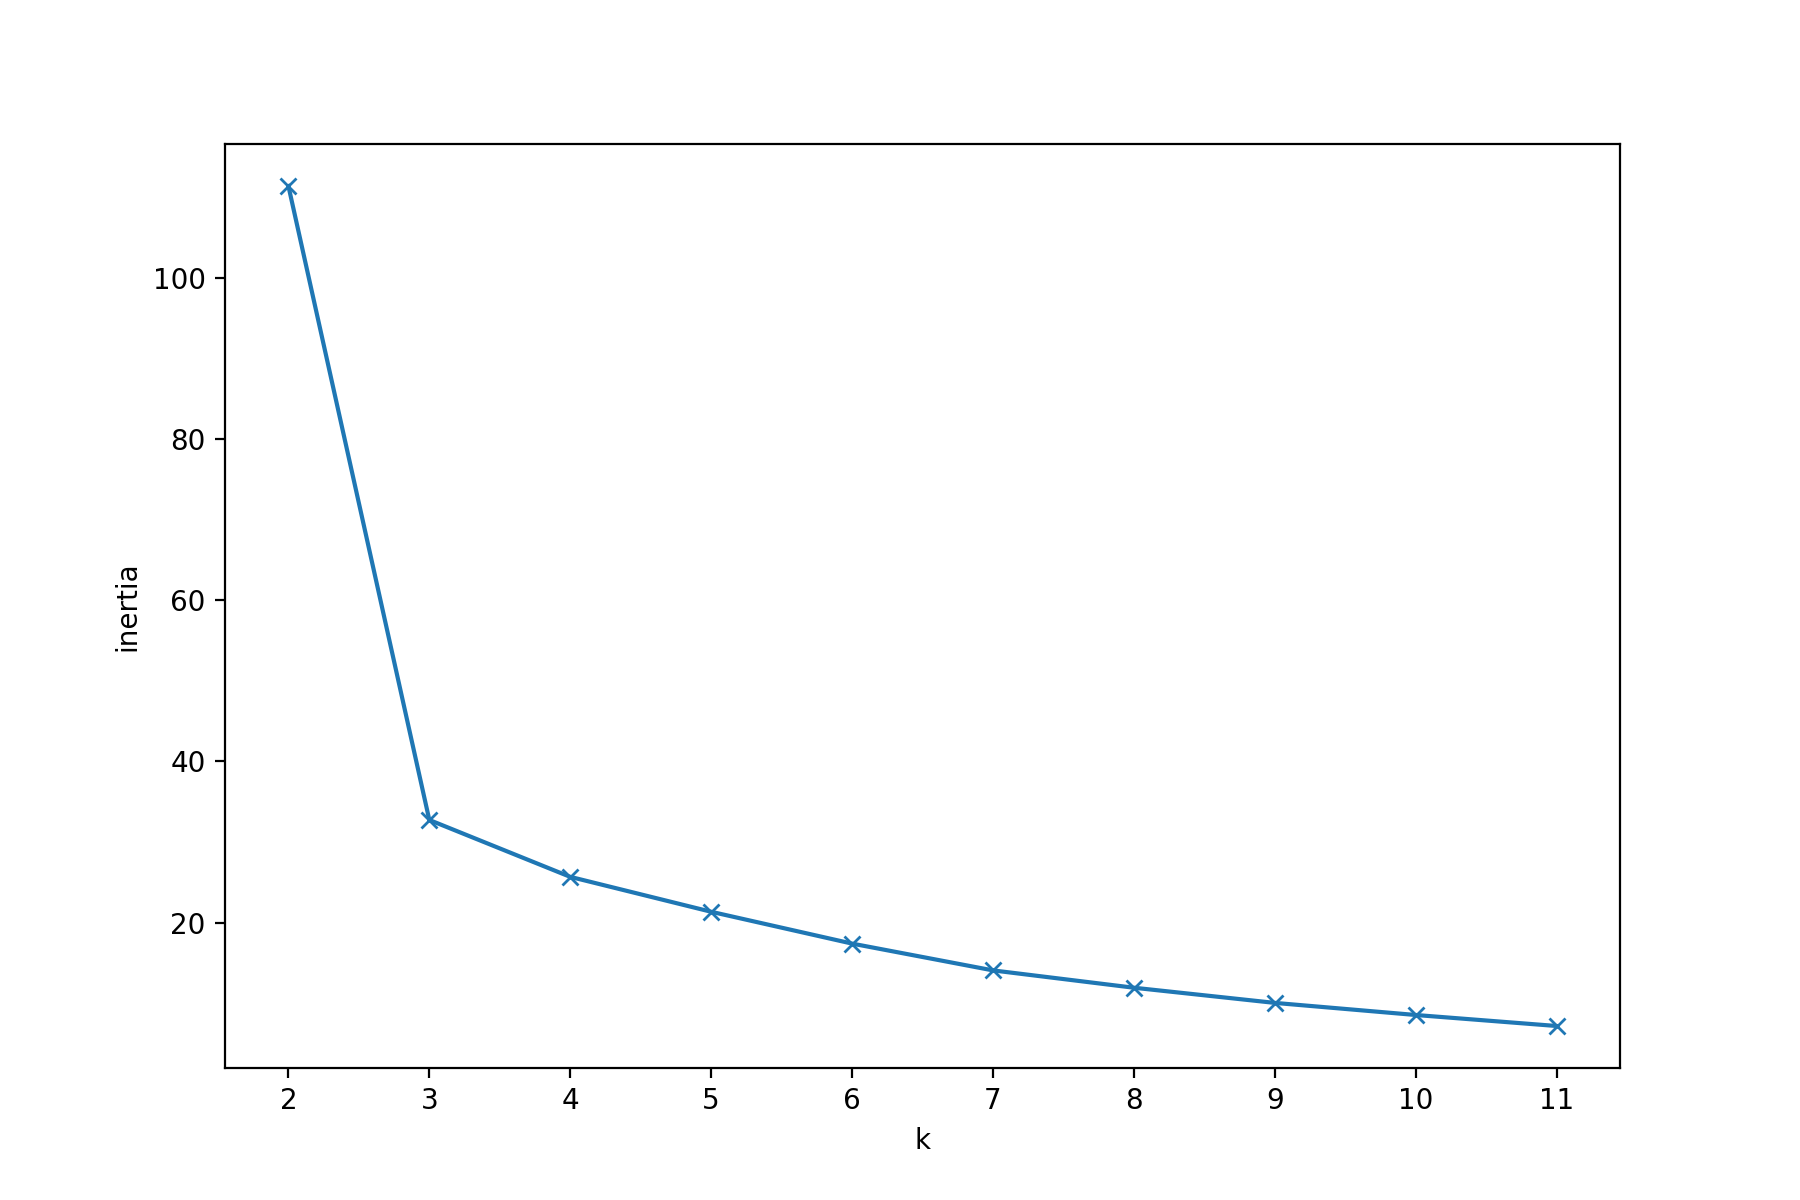

In [16]:
plt.figure(figsize=(9,6))
pd.Series({k: KMeans(k).fit(x).inertia_ for k in range(2,12)
          }).plot(marker='x')
plt.xticks(range(2,12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()